In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
# Load CSV file into DataFrame
df = pd.read_csv('Flyzy_Flight_Cancellation.csv')
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [175]:
df.tail()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
2995,1265781,Airline D,395,Airport 2,Airport 3,0,6,1,Type B,0.190018,1.00000,2.451216,0.283440,1
2996,5440150,Airline E,547,Airport 1,Airport 4,22,4,7,Type E,0.719271,91.00000,0.027039,0.665294,1
2997,779080,Airline C,461,Airport 1,Airport 3,8,3,1,Type B,0.458724,3.00000,1.131315,0.991307,0
2998,4044431,Airline B,464,Airport 3,Airport 3,5,5,3,Type E,0.443373,46.00000,0.968651,0.254808,1
2999,2806578,Airline A,369,Airport 1,Airport 2,1,1,10,Type A,0.704563,18.66667,1.879411,0.532486,1


In [176]:
df.shape

(3000, 14)

In [177]:
#Detecting missing values
df.isnull()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [178]:
df.isnull().sum()

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64

In [179]:
#Detecting outliers
df.describe()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.997429e+06,498.909333,11.435000,3.963000,6.381000,0.524023,26.793383,2.317439,0.515885,0.690667
std,2.868139e+06,98.892266,6.899298,2.016346,3.473979,0.290694,27.874733,1.430386,0.295634,0.462296
min,3.681000e+03,138.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.000000
25%,2.520313e+06,431.000000,6.000000,2.000000,3.000000,0.278011,7.000000,1.092902,0.265793,0.000000
50%,5.073096e+06,497.000000,12.000000,4.000000,6.000000,0.522180,18.000000,2.126614,0.517175,1.000000
75%,7.462026e+06,566.000000,17.000000,6.000000,9.000000,0.776323,38.000000,3.525746,0.770370,1.000000
max,9.999011e+06,864.000000,23.000000,7.000000,12.000000,1.099246,259.000000,5.189038,1.123559,1.000000


In [180]:
#Get numerical columns
num_cols = df.describe()
col_names = num_cols.columns
col_names

Index(['Flight ID', 'Flight_Distance', 'Scheduled_Departure_Time',
       'Day_of_Week', 'Month', 'Weather_Score',
       'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load',
       'Flight_Cancelled'],
      dtype='object')

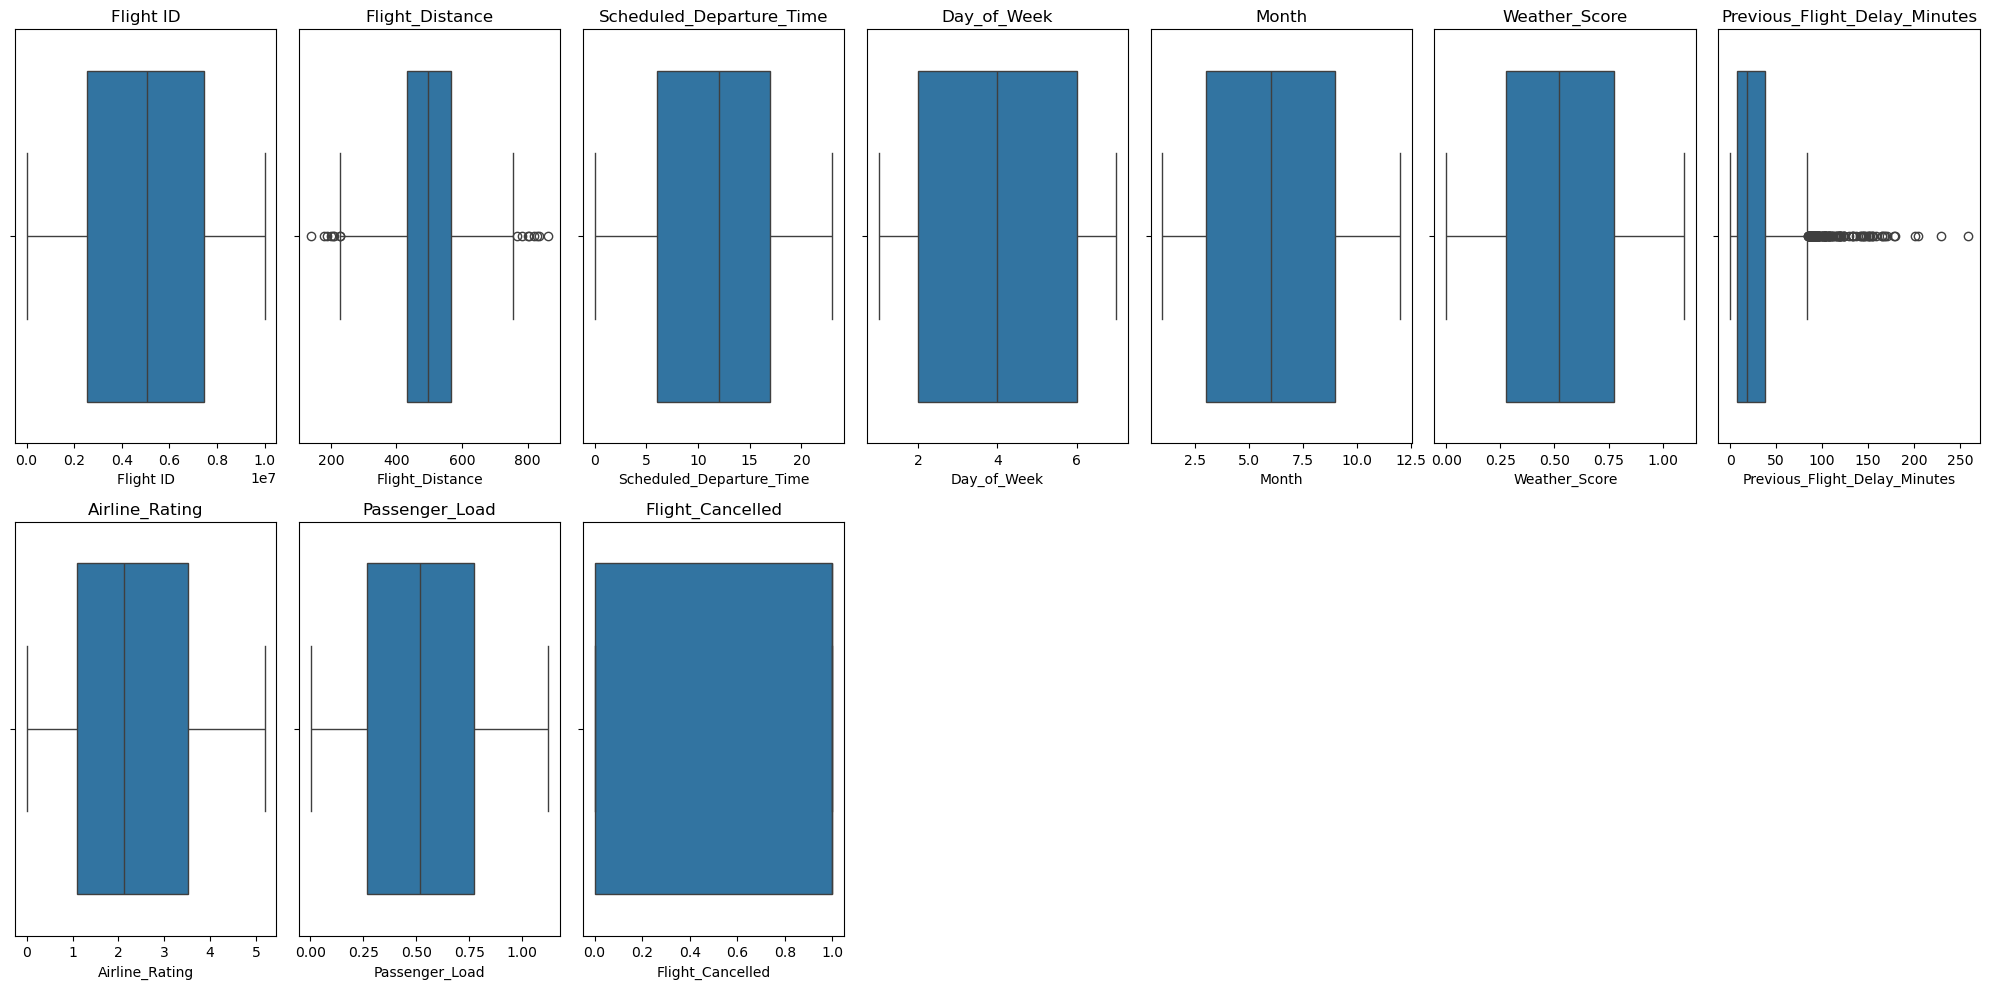

In [184]:
grid_size = (2, 7) 
col_names = [ 'Flight ID',
    'Flight_Distance',
    'Scheduled_Departure_Time',
    'Day_of_Week',
    'Month',
    'Weather_Score',
    'Previous_Flight_Delay_Minutes',
    'Airline_Rating',
    'Passenger_Load',
    'Flight_Cancelled'
]            

fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(col_names):
        sns.boxplot(data=df, x=col_names[i], ax=ax)
        ax.set_title(col_names[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
cleaned_df = df.copy()
for col in df.columns:
    cleaned_df = remove_outliers(cleaned_df, col)

In [ ]:
cleaned_df.shape

In [ ]:
#Checking for data types
df.dtypes

In [ ]:
df = df.apply(pd.to_numeric,errors='coerce').fillna(0)

In [ ]:
df.dtypes

In [ ]:
#Describing data
df.describe().T

In [ ]:
# Plot histograms for all columns
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

In [ ]:
#Relationship between features using correlation
data = {
    'Flight ID': [1, 2, 3, 4, 5],
    'Flight_Distance': [1000, 1500, 2000, 2500, 3000],
    'Scheduled_Departure_Time': [10, 12, 14, 16, 18],
    'Day_of_Week': [1, 2, 3, 4, 5],
    'Month': [1, 2, 3, 4, 5],
    'Weather_Score': [7, 6, 8, 5, 9],
    'Previous_Flight_Delay_Minutes': [10, 20, 30, 40, 50],
    'Airline_Rating': [4.5, 4.2, 4.7, 4.0, 4.8],
    'Passenger_Load': [50, 60, 70, 80, 90],
    'Flight_Cancelled': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
x_column = 'Flight_Distance'
plt.figure(figsize=(20, 30))

for column in ['Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month', 
                'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 
                'Passenger_Load', 'Flight_Cancelled']:
    sns.scatterplot(x=df[x_column], y=df[column], label=column)
    
plt.legend(title='Columns')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Relationship between features and target variable
num_features = [
    'Flight_Distance',
    'Scheduled_Departure_Time',
    'Weather_Score',
    'Previous_Flight_Delay_Minutes',
    'Passenger_Load'
]
# Create box plots for each feature
for feature in num_features:
    sns.boxplot(x='Flight_Cancelled', y=feature, data=data)
    plt.title(f'{feature} vs Flight Cancelled')
    plt.figure(figsize=(8, 6))
    plt.show()

In [ ]:
categorical_cols = [
    'Flight_Distance',
    'Scheduled_Departure_Time',
    'Weather_Score',
    'Previous_Flight_Delay_Minutes',
    'Passenger_Load'
]
# Create categorical count plots for each feature
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Flight_Cancelled', data=data)
    plt.title(f'{col} vs Flight Cancelled')
    plt.xticks(rotation=45)
    plt.show()